<hr>

**Link: https://drive.google.com/file/d/1aEuXxadTlHS4d_BBqrhVVurOFI154ATS/view?usp=sharing**

# **Big Basket 🧺**
  # **Forget the days of grocery shopping being a chore! Imagine this: you're lounging on the couch, phone in hand, and with a few taps you've got a truckload (well, maybe a basketful) of fresh produce, pantry staples, and even household essentials on their way to your doorstep. That's the magic of bigbasket, India's one stop grocery shopping destination.**

  # **They've got over 20,000 products from all your favorite brands, so you can stock up on everything you need without ever leaving home. Fruits and veggies? Got it. Dairy and meat for that epic dinner party? No problem. Bigbasket even has beauty supplies and cleaning products, so you can basically tackle your entire shopping list in one place. Plus, they have crazy convenient delivery options, so you can ditch the supermarket lines and spend that time doing way cooler things (like prepping for that dinner party!). Bigbasket basically makes grocery shopping a breeze, so you can get back to the fun stuff.**

<hr>

# **About the dataset 📊**

**This dataset is basically a big ol' bunch of info about products, all broken down into 10 easy-peasy pieces:**

  * **Index: This is just a fancy way of saying it's a unique ID for each item, like a fingerprint in the data world.**
  * **Product: The name of the product, just like you'd see it on the website.**
  * **Category: The broad group the product falls into, like groceries or home stuff.**
  * **Sub-Category: This is like zooming in on the category. So, maybe "groceries" becomes "fruits" or "home stuff" becomes "cleaning supplies."**
  * **Brand: Who makes the product? You know, like Nike or that yummy jam brand you love.**
  * **Sale Price: How much you gotta pay for it right now.**
  * **Market Price: This is kind of like a reference point, showing the usual price for the product.**
  * **Type: Another way to classify the product, just for extra organization.**
  * **Rating: What other customers think! This is a number showing how much people liked it.**
  * **Description: This is where they tell you all the juicy details about the dataset itself, what it includes and how it's put together**

<hr>

# **Step 1 - Loading up the libraries📚**

**Configuration Libraries**

In [ ]:
import warnings
from google.colab import drive
drive.mount('/content/drive')
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Mandatory Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

<hr>

# **Step 2- Data Loading and Inspection Phase🔍**

**Data Loading**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/BBData.csv")

**Data Inspection**

In [ ]:
df.head().style.set_properties(
    **{
        'background-color': 'black',
        'color': 'lightgreen',
        'border-color': 'lightgreen',
        "border-style": "solid"
        }
)

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.000000,220.000000,Hair Oil & Serum,4.100000,"This Product contains Garlic Oil that is known to help proper digestion, maintain proper cholesterol levels, support cardiovascular and also build immunity. For Beauty tips, tricks & more visit https://bigbasket.blog/"
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.000000,180.000000,Water & Fridge Bottles,2.300000,"Each product is microwave safe (without lid), refrigerator safe, dishwasher safe and can also be used for re-heating food and not for cooking. All containers come with airtight lids and a wide variety of attractive colours. Stack these stylish and colourful containers in your kitchen with ease and for a look-good factor."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.000000,250.000000,Lamp & Lamp Oil,3.400000,"A perfect gift for all occasions, be it your mother, sister, in-laws, boss or your friends, this beautiful designer piece wherever placed, is sure to beautify the surroundings Traditional design This type diya has been used for Diwali and All other Festivals for centuries. Sturdy and easy to carry The feet keep it balanced to ensure safety. Wonderful Oil Lamp made in Brass also called as Jyoti. This is a handcrafted piece of Indian brass Deepak."
3,4,Cereal Flip Lid Container/Storage Jar - Assorted Colour,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.000000,176.000000,"Laundry, Storage Baskets",3.700000,"Multipurpose container with an attractive design and made from food-grade plastic for your hygiene and safety ideal for storing pulses. Grains, spices, and more with easy opening and closing flip-open lid. Strong, durable and transparent body for longevity and easy identification of contents. Multipurpose storage solution for your daily needs stores your everyday food essentials in style with the Nakoda container set. With transparent bodies, you can easily identify your stored items without having to open the lids. These containers are ideal for storing a large variety of items such as food grains, snacks and pulses to sugar, spices, condiments and more. Featuring unique flip-open lids, you can easily open and close this container without any hassles. The Nakoda container is made from high-quality food-grade and BPA-free plastic that is 100% safe for storing food items. You can safely store your food items in this container without worrying about contamination and harmful toxins. As they are constructed using highly durable virgin plastic, this container will last for a long time even with regular use. This container can enhance the overall look of your kitchen decor. Being dishwasher safe, cleaning and maintaining this container is an easy task. You can also use a simple soap solution to manually wash and retain their looks for a long time."
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.000000,162.000000,Bathing Bars & Soaps,4.400000,"Nivea Creme Soft Soap gives your skin the best care that it must get. The soft bar consists of Vitamins F and Almonds which are really skin gracious and help you get great skin. It provides the skin with moisture and leaves behind flawless and smooth skin. It makes sure that your body is totally free of germs & dirt and at the same time well nourished.For Beauty tips, tricks & more visit https://bigbasket.blog/"


<hr>

**Shape Inspection**

In [ ]:
a = df.shape
print(f"Rows: {a[0]} and Columns: {a[1]}")

Rows: 27555 and Columns: 10


<hr>

**Information**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27555 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


<hr>

# **Step 3 - Data Preprocessing**

**Null check**

In [ ]:
df.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

**Insights**
  * **Here the `product` columns seems to have null values, along with `brand` columns**
  * **Moreover, the rating and description are also having null values with them**

<hr>

**Working with the product**

In [ ]:
df["product"] = df["product"].fillna("NO_PRODUCT_NAME")

<hr>

**Work with brand**

In [ ]:
df["brand"].value_counts()

brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
                   ... 
Wellastrate           1
Clean & Fresh         1
Lal                   1
Glint                 1
Baron De Bercy        1
Name: count, Length: 2313, dtype: int64

In [ ]:
df["brand"].mode()[0] # Series (indexed 1-D array) [index]

'Fresho'

In [ ]:
df["brand"] = df["brand"].fillna(df["brand"].mode()[0])

<hr>

**Work with description**

In [ ]:
df.description = df["description"].fillna("UNKNOWN_DESCRIPTION")

<hr>

**Working with rating**

<Axes: xlabel='rating', ylabel='Density'>

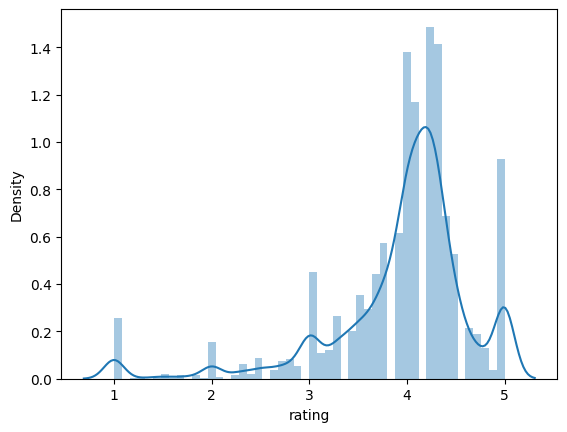

In [ ]:
sns.distplot(df["rating"])

In [ ]:
df["rating"].mean(), df["rating"].median()

(3.943409583179249, 4.1)

In [ ]:
df["rating"] = df["rating"].fillna(df["rating"].mean())
# df["rating"] = df["rating"].fillna(df["rating"].median())

<Axes: xlabel='rating', ylabel='Density'>

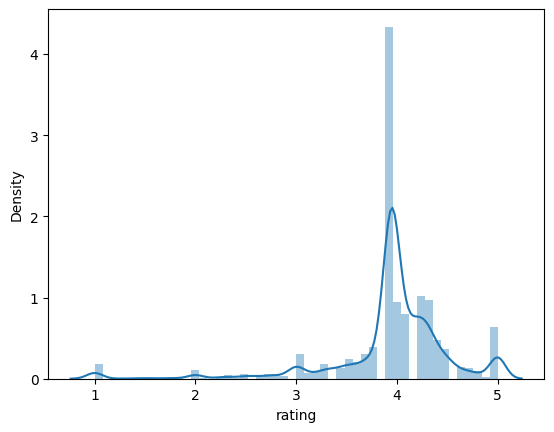

In [ ]:
sns.distplot(df["rating"])

<hr>

**Round off the numerical values for prices**

In [ ]:
df["sale_price"] = df["sale_price"].round().astype("int64")

In [ ]:
df["market_price"] = df["market_price"].round().astype("int64")

<hr>

# **Step 4 - Exploratory Data Analysis 🌐🫨**

**Objective 1 - Finding out the discounts available on items**

In [ ]:
df["discounts"] = (((df["market_price"] - df["sale_price"]) / df["market_price"]) * 100)

In [ ]:
df["discounts"].head().to_frame()

,discounts
0,0.000000
1,0.000000
2,52.400000
3,15.340909
4,0.000000


<hr>

**Objective 2 - Find out the particular product or category that relates to the highest discounts**

In [ ]:
df[["product", "category", "discounts"]][df["discounts"] == df["discounts"].max()]

,product,category,discounts
26976,Curry Leaves,Fruits & Vegetables,86.666667


<hr>

**Extended Objective: Find out the top 15 most discounted products**

In [ ]:
df[["product", "category", "discounts"]].sort_values("discounts", ascending = False).head(15).style.background_gradient("Greens")

,product,category,discounts
26976,Curry Leaves,Fruits & Vegetables,86.666667
17713,Fruit & Vegetables Hand Juicer,"Kitchen, Garden & Pets",82.506266
13318,Small Silicone Spatula With Plastic Handle - Assorted Colours,"Kitchen, Garden & Pets",81.203008
13740,Decorative Party Light Big Star String LED Light 2 M - Multicolour,"Kitchen, Garden & Pets",80.982712
10438,NHS 860 Temperature Control Professional Hair Straightener,Beauty & Hygiene,80.501044
4562,Concealer Brush 930,Beauty & Hygiene,80.000000
11473,Decorative Party Light Golden Bell String LED Light 7 M - Warm White,"Kitchen, Garden & Pets",79.239620
13265,Decorative Party Light Golden Bell String LED Light 7 M - Multicolour,"Kitchen, Garden & Pets",79.239620
10092,USB String Fairy Lights 3M 30 LED For Decoration - Multicolour,"Kitchen, Garden & Pets",78.696742
24292,Steel Belly Shape Storage Dabba/ Container Set With PP Lid - Silver & Purple,"Kitchen, Garden & Pets",77.989950


<hr>

**Insights**
  * **Maximun discounted category is `Kitchen, Garden & Pets`, on an average there is around 22%**

In [ ]:
df[df["category"] == "Fruits & Vegetables"]["discounts"].mean()

21.266544727722216

In [ ]:
df.groupby(["category"])["discounts"].mean().sort_values(ascending = False)

category
Kitchen, Garden & Pets      22.174895
Fruits & Vegetables         21.266545
Beauty & Hygiene            12.354489
Foodgrains, Oil & Masala    11.847165
Cleaning & Household        10.795026
Beverages                    9.564089
Eggs, Meat & Fish            8.064908
Gourmet & World Food         7.869536
Bakery, Cakes & Dairy        7.684198
Snacks & Branded Foods       6.642546
Baby Care                    5.856489
Name: discounts, dtype: float64

**Business Action**
  * **`Advantages`**
    * **Stack similar or related products along with the rack of kitchen, garden & pets (Inventory, stock up, sourcing team will work with procurement to get the items available)**
    * **Due to fast movement or competitive pricing the discounts has been there in the top category (Mangement Team)**

  * **`Disadvantages`**
    * **Overstocked (We need to improve the inventory management, need to check with sourcing team and procurement team)**
    
    * **Since the kitchen, Pet and Garden these are the items that have a less life, since it's has be consumed or used within a specific provided time, hence this could be reason for the organization to provide the discounts**



<hr>

**Objective 3 - Analysing the data on the basis on demands that is Products & Categories**

In [ ]:
# We are focusing on products and categories
catProd_data = df[["category", "product"]]

# Remove all the duplicated data
catProd_data = catProd_data.drop_duplicates()

# group the data, and then count them based on product like how many products are available in each category
catProd_data = catProd_data.groupby("category").agg(product_count = ('product', "count")).reset_index().sort_values("product_count", ascending = False)

In [ ]:
# Results
catProd_data.head()

,category,product_count
2,Beauty & Hygiene,6839
8,Gourmet & World Food,4109
9,"Kitchen, Garden & Pets",3186
10,Snacks & Branded Foods,2454
4,Cleaning & Household,2411


In [ ]:
fig = px.bar(catProd_data, x = "category", y = "product_count", color = "category", title = "Analysis on the basis of Category and Product Count")
fig.show()

<hr>

**Insights**

  * **We should focus on to increase the sales for beauty and hygiene since it has more number of products.(Management)**
  * **So, in order increase the demand we can do a market research on the demand of the Beautification and Hygiene and on the basis of that we can offer discounts on the products**

  * **Snacks and branded food items can be clubbed with Gourment & World food**

  * **We can also reduce the supply for the same, as we are having ample amount of products in this category**

  * **Seasonal offers can be also included, to increase the demand**

<hr>

**Objective 4 - Analysis on the basis of Brand and Type, to know which are the brands that are famous among consumer and what kind of products are famous from those brands**

In [ ]:
# We are focusing on products and categories
brandType_data = df[["brand", "type"]]

# Remove all the duplicated data
brandType_data = brandType_data.drop_duplicates()

# group the data, and then count them based on product like how many products are available in each category
brandType_data = brandType_data.groupby("brand").agg(type_count = ('type', "count")).reset_index().sort_values("type_count", ascending = False)

In [ ]:
fig = px.bar(brandType_data.head(10), x = "brand", y = "type_count", color = "brand", title = "Analysis on the basis of Brand and Type Count")
fig.show()

<hr>

**Price Analysis**

In [ ]:
print(f"Analysis on Sales price")
print("Mean: ", df["sale_price"].mean())
print("Maximum Pricing: ", df["sale_price"].max())
print("Minimum Pricing: ", df["sale_price"].min())

Analysis on Sales price
Mean:  322.5060424605335
Maximum Pricing:  12500
Minimum Pricing:  2


**Defining the ranges**

In [ ]:
range_val = [
    ['1-10',1, 10],
 ['11-25', 11, 25],
  ['26-50', 26, 50],
   ['51-100',51, 100],
    ['101-150', 101, 150],
     ['151-200', 151, 200],
      ['201-300',201, 300],
       ['301-400', 301, 400],
        ['401-500', 401, 500],
         ['501-1000',501, 1000],
          ['1001-1500', 1001, 1500],
           ['1501-2000', 1501, 2000],
              ['2001-3000',2001, 3000],
               ['3001-5000', 3001, 5000],
                ['5001-10000', 5001, 10000],
                 ['10001-15000',10001, 15000]]

In [ ]:
# Define the range data
range_data = pd.DataFrame(range_val, columns = ["range_name", "min_value", "max_value"])

range_data

,range_name,min_value,max_value
0,1-10,1,10
1,11-25,11,25
2,26-50,26,50
3,51-100,51,100
4,101-150,101,150
5,151-200,151,200
6,201-300,201,300
7,301-400,301,400
8,401-500,401,500
9,501-1000,501,1000


In [ ]:
# Trying to find the number of items present in a specific range
range_data["product_count"] = ""

In [ ]:
for idx, rows in range_data.iterrows():
  range_data.at[idx, "product_count"] = len(df["product"][(df["sale_price"] >= rows["min_value"]) & (df["sale_price"] <= rows["max_value"])])
  # range_data[0, "product_count"]

In [ ]:
range_data

,range_name,min_value,max_value,product_count
0,1-10,1,10,178
1,11-25,11,25,689
2,26-50,26,50,2232
3,51-100,51,100,4654
4,101-150,101,150,3661
5,151-200,151,200,3196
6,201-300,201,300,4568
7,301-400,301,400,2555
8,401-500,401,500,1693
9,501-1000,501,1000,2773


In [ ]:
fig = px.bar(range_data, x = "range_name", y = "product_count", color = "range_name", title = "Price Analysis")
fig.show()